In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.proportion import proportions_ztest
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import numpy as np

In [3]:
# Data from Table 1: [Employed, Total Population]
group_hs_minus = [8498, 19789]
group_hs = [34497, 63707]
group_ca = [34523, 56540]
group_b_plus = [61394, 85981]

print("Employment data loaded.")

Employment data loaded.


In [4]:
# Test 1: HS- vs HS
count1 = np.array([group_hs_minus[0], group_hs[0]])
nobs1 = np.array([group_hs_minus[1], group_hs[1]])

# 'alternative='smaller'' tests Ha: p1 < p2
z_stat1, p_value1 = proportions_ztest(count1, nobs1, alternative='smaller')

print(f"--- Z-Test: HS- < HS ---")
print(f"Z-statistic: {z_stat1:.3f} (Report: -27.553)")
print(f"P-value: {p_value1} (Report: 'essentially zero')")

--- Z-Test: HS- < HS ---
Z-statistic: -27.553 (Report: -27.553)
P-value: 2.0571781368903748e-167 (Report: 'essentially zero')


In [5]:
# Test 2: HS vs C/A
count2 = np.array([group_hs[0], group_ca[0]])
nobs2 = np.array([group_hs[1], group_ca[1]])

z_stat2, p_value2 = proportions_ztest(count2, nobs2, alternative='smaller')

print(f"--- Z-Test: HS < C/A ---")
print(f"Z-statistic: {z_stat2:.3f} (Report: -24.185)")
print(f"P-value: {p_value2} (Report: 'essentially zero')")

--- Z-Test: HS < C/A ---
Z-statistic: -24.185 (Report: -24.185)
P-value: 1.597398060936241e-129 (Report: 'essentially zero')


In [6]:
# Test 3: C/A vs B+
count3 = np.array([group_ca[0], group_b_plus[0]])
nobs3 = np.array([group_ca[1], group_b_plus[1]])

z_stat3, p_value3 = proportions_ztest(count3, nobs3, alternative='smaller')

print(f"--- Z-Test: C/A < B+ ---")
print(f"Z-statistic: {z_stat3:.3f} (Report: -40.727)")
print(f"P-value: {p_value3} (Report: 'essentially zero')")

--- Z-Test: C/A < B+ ---
Z-statistic: -40.727 (Report: -40.727)
P-value: 0.0 (Report: 'essentially zero')


In [7]:
# Re-creating Table 2 from your report
data = {
    'Parent Education Level': [1, 2, 3, 4], # Quantified levels
    'HS-': [0.209516, 0.110456, 0.080688, 0.051196],
    'HS': [0.331340, 0.327560, 0.230100, 0.141942],
    'C/A': [0.28958, 0.33040, 0.39394, 0.31140],
    'B+': [0.169586, 0.231618, 0.295260, 0.495440]
}
df_edu = pd.DataFrame(data)

print("Education transition data loaded.")
df_edu.head()

Education transition data loaded.


,Parent Education Level,HS-,HS,C/A,B+
0,1,0.209516,0.331340,0.28958,0.169586
1,2,0.110456,0.327560,0.33040,0.231618
2,3,0.080688,0.230100,0.39394,0.295260
3,4,0.051196,0.141942,0.31140,0.495440


In [8]:
print("--- Regression: Parent Ed vs. Child B+ ---")
X1 = df_edu[['Parent Education Level']] # scikit-learn needs 2D input
y1 = df_edu['B+']

model1 = LinearRegression()
model1.fit(X1, y1)

# Get results
intercept1 = model1.intercept_
coef1 = model1.coef_[0]
r2_1 = r2_score(y1, model1.predict(X1))

print(f"Equation: y = {intercept1:.6f} + {coef1:.7f}x")
print(f"  (Report: y = 0.037675 + 0.1041204x)")
print(f"R-squared: {r2_1:.10f}")
print(f"  (Report: 0.905129390...)")

--- Regression: Parent Ed vs. Child B+ ---
Equation: y = 0.037675 + 0.1041204x
  (Report: y = 0.037675 + 0.1041204x)
R-squared: 0.9051293902
  (Report: 0.905129390...)


Generating Plot (Figure 2)...


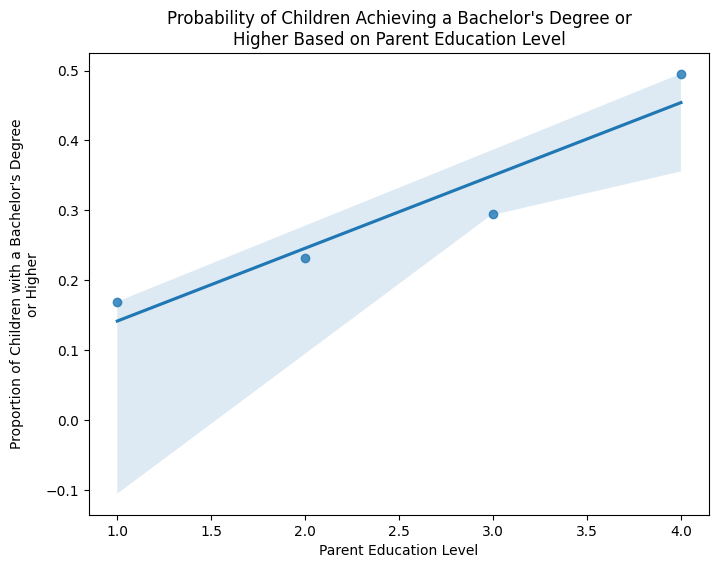

In [9]:
print("Generating Plot (Figure 2)...")

plt.figure(figsize=(8, 6))
sns.regplot(data=df_edu, x='Parent Education Level', y='B+')
plt.title('Probability of Children Achieving a Bachelor\'s Degree or\nHigher Based on Parent Education Level')
plt.ylabel("Proportion of Children with a Bachelor's Degree\nor Higher")
plt.show()

In [10]:
print("\n--- Regression: Parent Ed vs. Child HS- ---")
X2 = df_edu[['Parent Education Level']]
y2 = df_edu['HS-']

model2 = LinearRegression()
model2.fit(X2, y2)

# Get results
intercept2 = model2.intercept_
coef2 = model2.coef_[0]
r2_2 = r2_score(y2, model2.predict(X2))

print(f"Equation: y = {intercept2:.6f} + {coef2:.7f}x")
print(f"  (Report: y = 0.239146 + -0.0504728x)")
print(f"R-squared: {r2_2:.10f}")
print(f"  (Report: 0.89791855...)")


--- Regression: Parent Ed vs. Child HS- ---
Equation: y = 0.239146 + -0.0504728x
  (Report: y = 0.239146 + -0.0504728x)
R-squared: 0.8979185525
  (Report: 0.89791855...)


Generating Plot (Figure 3)...


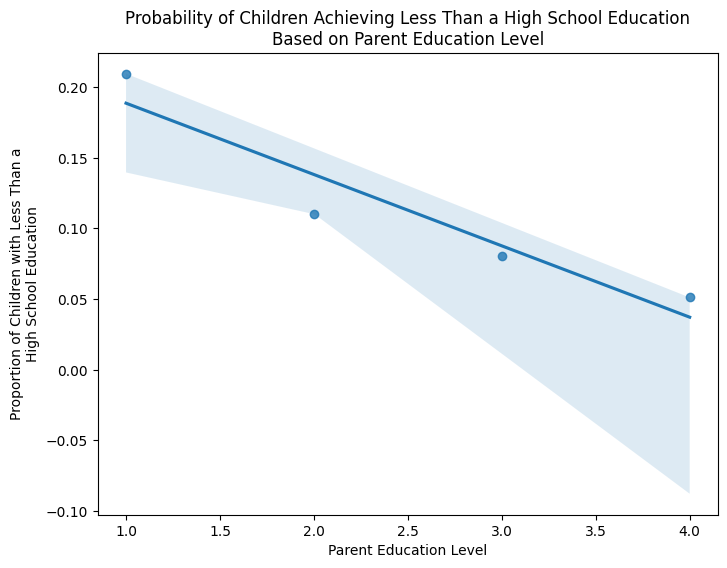

In [11]:
print("Generating Plot (Figure 3)...")

plt.figure(figsize=(8, 6))
sns.regplot(data=df_edu, x='Parent Education Level', y='HS-')
plt.title('Probability of Children Achieving Less Than a High School Education\nBased on Parent Education Level')
plt.ylabel('Proportion of Children with Less Than a\nHigh School Education')
plt.show()